## $\color{red}{\text{Hypothesis tests}}$
---
- Hypothesis testing is a formal and rigorous way of testing observed claims
  - Most of the time the claims concern population parameters such as mean, median or variance
- Examples of **observed claims**:
  - The newly developed oil will increase mileage by at least 10 miles
  - The newly developed drug is more effective than the old one
  - The new company logo will increase website traffic by at least 2 fold
  - There is no difference between two methods of teaching
- Typically, hypothesis tests falls under two categories: **parametric** and **non-parametric**
  - For **parametric** tests we assume that the claims follow some known probability distribution such as binomial, normal, T, etc.
  - **Non-parametric** tests assumes that the claims do not follow any known probability distribution

## $\color{red}{\text{Elements of hypothesis tests}}$
---
- There are four elements of every hypothesis test: the null hypothesis ($H_0$), alternative hypothesis ($H_1$), the test statistic and rejection rejection
  - The **null hypothesis** is the current accepted claim until there's overwhelming evidence for the **alternative hypothesis**
  - The **test statistic** is a function used to make a decision on rejecting or not rejecting $H_0$
  - The **rejection region** represent values of the test statistic for which $H_0$ is be rejected in favor of the $H_1$
- The validity of hypothesis tests are often communicated through a **p-value**
  - A **p-value** or **significance level** is the smallest value of $\alpha$ for which the oberserved data indicates that the null hypothesis should be rejected. That is, the smaller the p-value, the more compelling the evidence points to the rejection of the null hypothesis

## $\color{red}{\text{Errors in hypothesis tests}}$
- There are two types of errors in hypthesis testing: **type I** and **type II**
- Type I error is committed if $H_0$ is rejected when it is true. That is, the current cliam is rejected when there's no evidence to support its rejection
  - The probability of committing a type I error is $\alpha$, also called the **significance level**
- Type II error is committed if $H_0$ is accepted when $H_1$ is true. That is, the current claim is accepted when there's evidence to reject it
  - The probability of a type II error is $\beta$

## $\color{red}{\text{Some common parametric tests}}$


###$\color{blue}{\text{The F-test}}$
---
- **Purpose:** To determine if population variances are equal
- **Structure:**
  \begin{equation}
    \begin{array}{l}
      H_0: \sigma^2_{g1} = \sigma^2_{g2} \\
      H_1: \sigma^2_{g1} \neq \sigma^2_{g2}
    \end{array}
  \end{equation}

## $\color{red}{\text{Import Required Packages}}$

In [5]:
import numpy as np
import pandas as pd



## $\color{red}{\text{Import Data}}$

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/DS4510/Data
hr_df= pd.read_excel('hrData.xlsx', sheet_name='origData')

/content/drive/MyDrive/DS4510/Data


#### $\color{green}{\text{Example 1}}$
- What is the variance of `Age` across `Gender`?
- Calculate the variance of age
- Use the F-Test to decide if the results are statistically significant or not

In [7]:
#Subset data
sub_vars = ["Age", "Gender"]
sub_data = hr_df[sub_vars]

#Grouping the numeric by categorical
grouped = sub_data.groupby("Gender")

#sub_data.head()

#Apply some aggregation function
grp_var = grouped.var()
grp_var

,Age
Gender,
Female,85.860295
Male,81.763719


In [14]:
from scipy.stats import f_oneway

#Separate data by each category
male_age = sub_data[sub_data.Gender == "Male"]["Age"]
female_age = sub_data[sub_data.Gender == "Female"]["Age"]

#Perform the F-test
f_oneway(male_age, female_age)
male_age

,Age
1,49
2,37
4,27
5,32
7,30
...,...
1465,36
1466,39
1467,27
1468,49


###$\color{blue}{\text{Normality tests}}$
---
- Normality tests are conducted to determine whether a sample is drawn from a normal distribution
- Normality tests comes in two flavors: **visual** and **hypothesis tests**




####$\color{brown}{\text{QQ-Plot}}$
- Visual normality test includes the **QQ-Plots**
  - The **QQ-Plot** calculates the **z-scores** of all data points and orders it from high to low
  - The y-axis corresponds to the z-scores associated with the raw data
  - The x-axis corresponds to the quantile of a theoretical normal distribution
  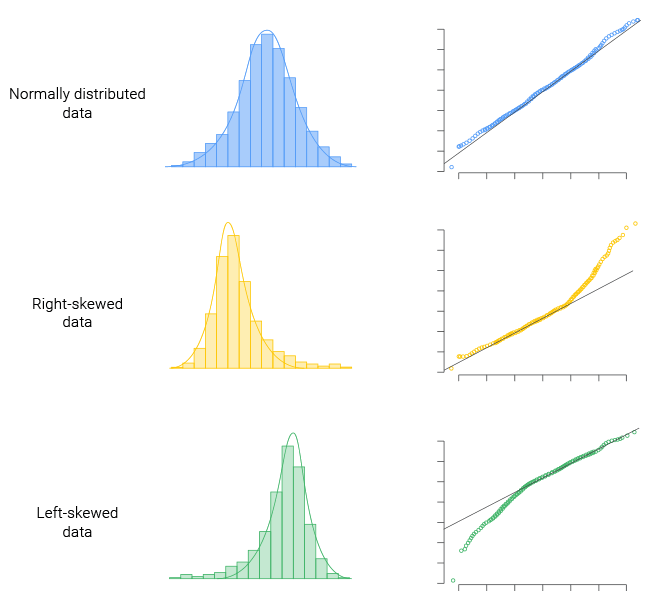

####$\color{brown}{\text{Formal tests}}$
- Hypothesis tests for normality includes the **Anderson-Darling** test, **K-S** test, **Shapiro-Wilks** tests, etc.
- The structure for the Anderson-Darling test is as follows:
  \begin{equation}
    \begin{array}{l}
      H_0: The \:data \:follows \:a \:normal \:distribution \\
      H_1: The \:data \:does \:NOT \:follows \:a \:normal \:distribution
    \end{array}
  \end{equation}

###$\color{blue}{\text{Student's T-Test}}$
---
- **Purpose**: To determine whether the means of two groups are equal
- **Assumption**: Both groups are sampled from normal distributions with equal variances
- **Structure**: \begin{equation}
  \begin{array}{l}
    H_0: \mu_{g1} = \mu_{g2} \\
    H_1: \mu_{g1} \neq \mu_{g2}
  \end{array}
\end{equation}




#### $\color{green}{\text{Example 2}}$
- Provide a QQplot of `age` by `Gender`. What does that tell you?
- Using a statistical test, determine whether the two means are equal or not. Keep in mind the assumptions of the test

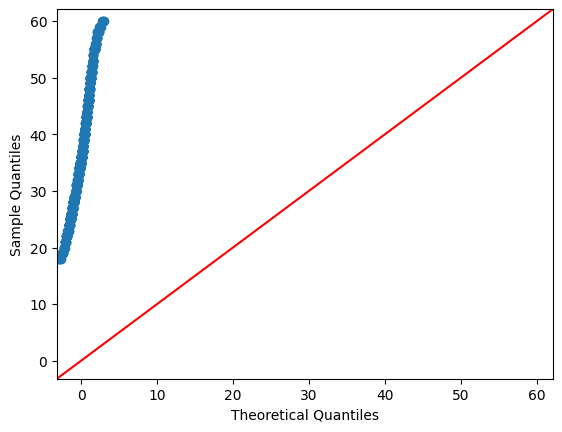

In [17]:
import statsmodels.api as sm
import matplotlib.pyplot as plot
#Get qq plot of male age
sm.qqplot(male_age, line='45')

plot.show()

In [22]:
from scipy.stats import shapiro
from scipy import stats

#Conduct a shapiro test
shapiro(sub_data.Age)

#Conduct a T-Test
t_stat, p_val = stats.ttest_ind(male_age, female_age)
print(p_val)

0.16409141231818586


###$\color{blue}{\text{The chi-square test}}$
---
- **Purpose:** To determine if there's correlation among two categorical variables
  - This is sometimes called chi-square test of independence
- **Structure:**
  \begin{equation}
    \begin{array}{l}
      H_0: The \:variables \:are \:independent \:(related) \\
      H_1: The \:variables \:are \:NOT \:independent \:(related)
    \end{array}
  \end{equation}
- **Comment:** There's also a chi-square **goodness-of-fit** test used to determine if the proportions of a categorical variables comes from an expected distribution or not


#### $\color{green}{\text{Example 3}}$
- For the dataset under consideration is there any relationship between `maritalStatus` and `Gender`?
- Use a chi-square test to understand any difference


In [26]:
pd.crosstab(index=hr_df["Gender"], columns = hr_df ["MaritalStatus"])

MaritalStatus,Divorced,Married,Single
Gender,,,
Female,117,272,199
Male,210,401,271
